<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

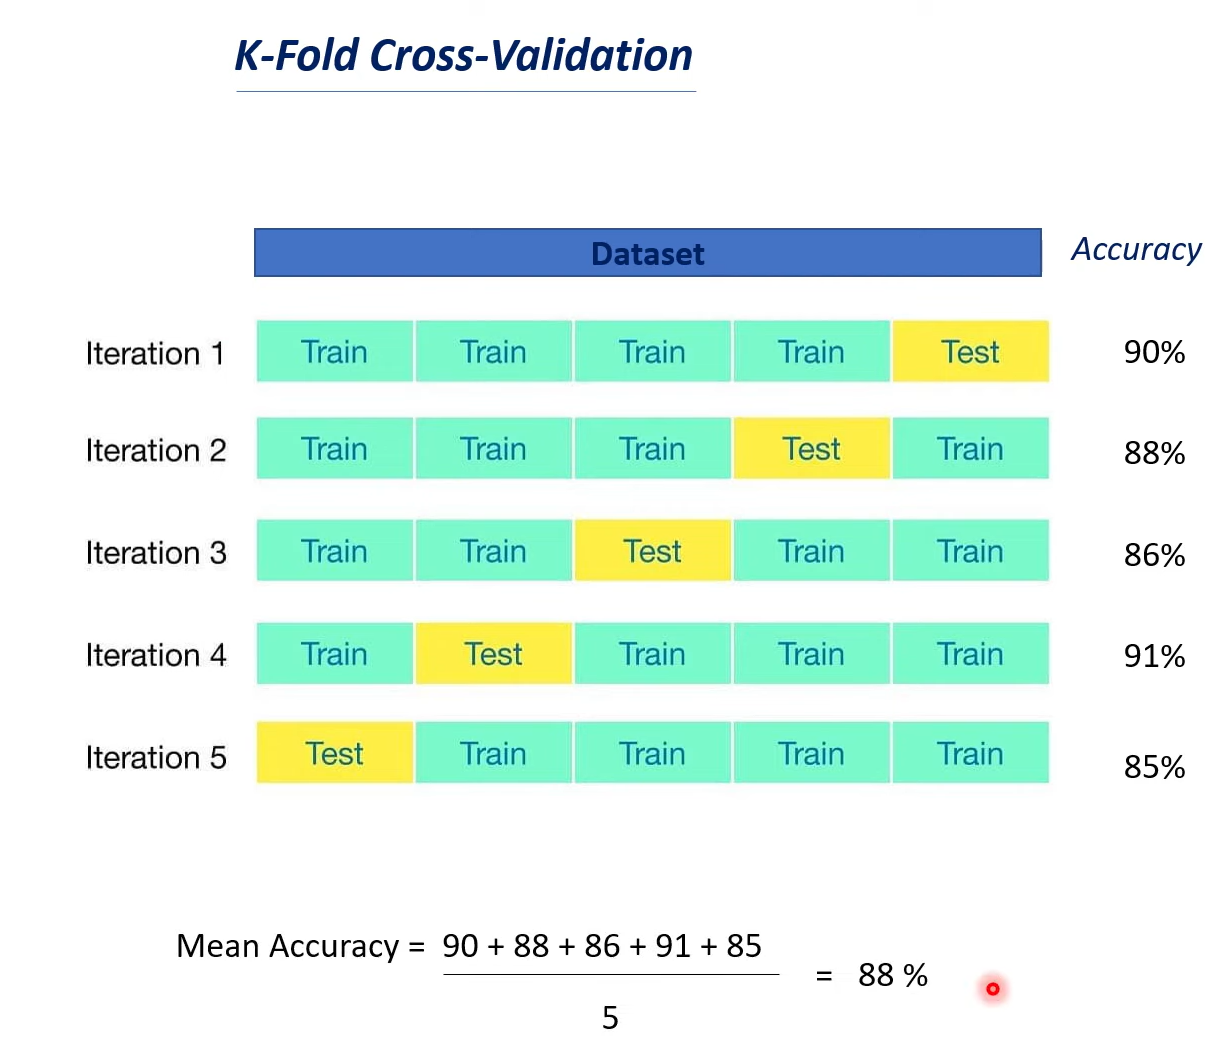

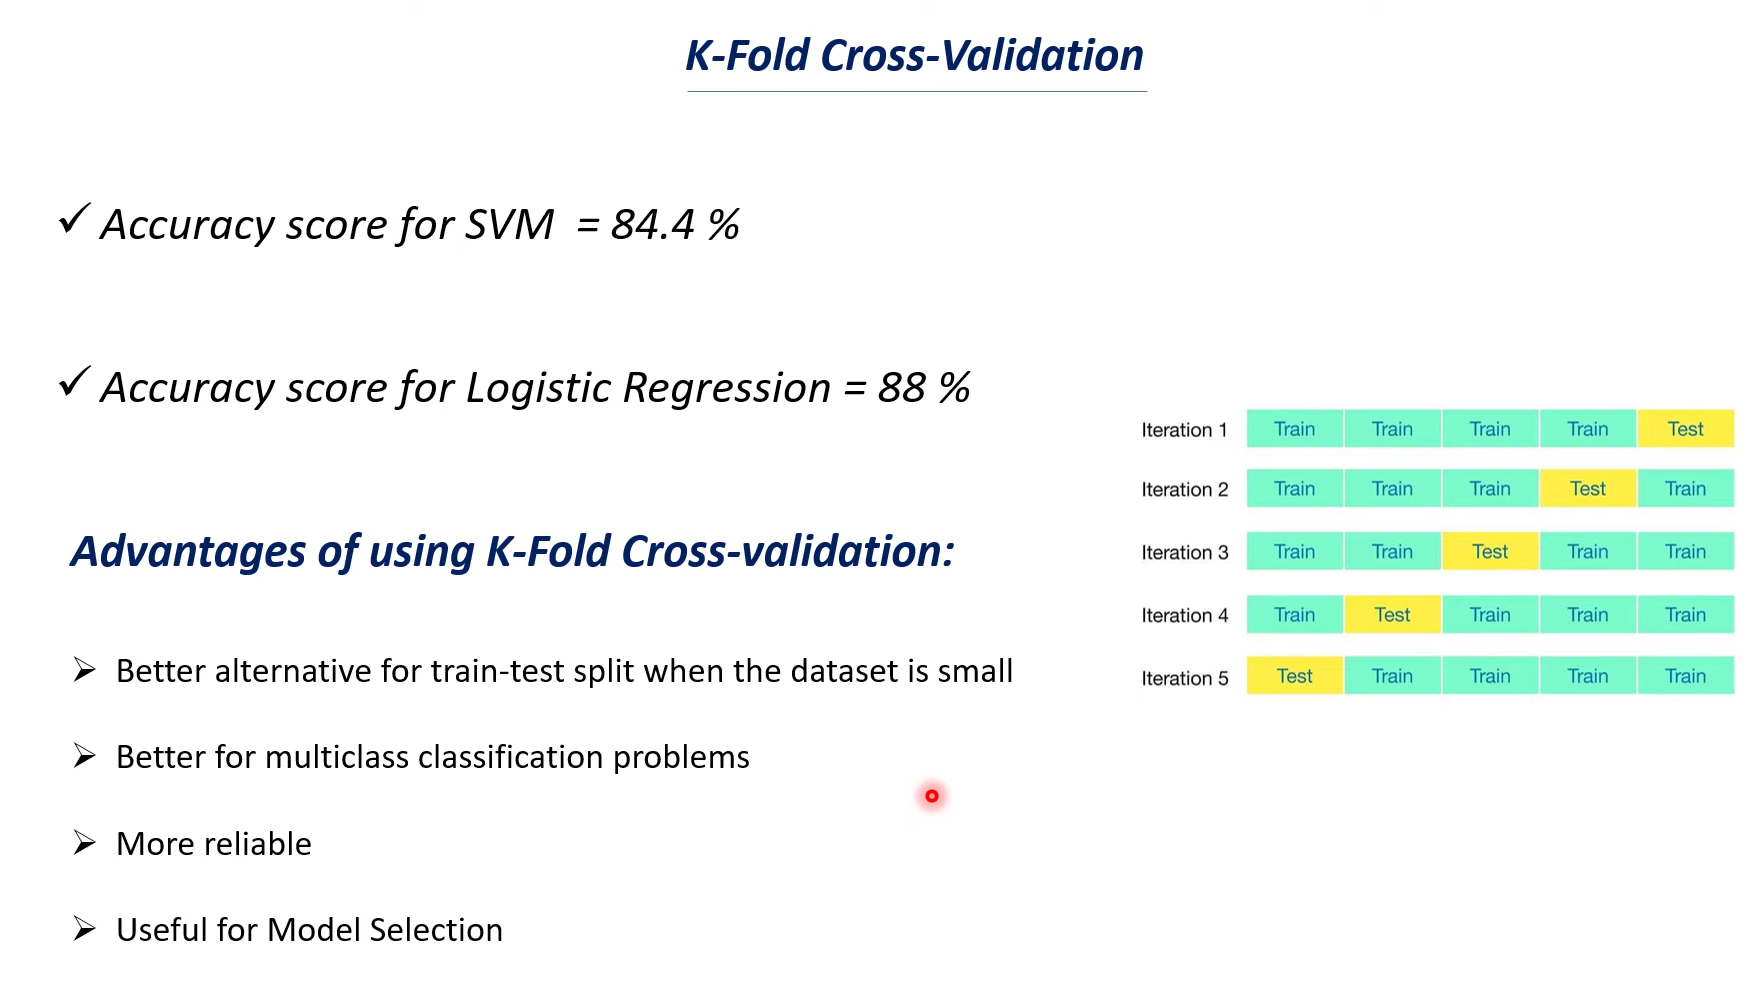

#**Train Test Split**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Data Collection And Pre-processing

In [ ]:
#loading heart.csv
heart_data = pd.read_csv("/content/drive/MyDrive/Databases /heart_data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
#checking null values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#checking distribution of target values
heart_data["target"].value_counts()

,count
target,
1,165
0,138


0 --> Healthy Heart

1 --> Defective Heart

In [ ]:
X = heart_data.drop(columns ="target", axis = 1)
Y = heart_data["target"]

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 3)

In [ ]:
print(X_train.size, X_test.size, Y_train.size, Y_test.size)

3146 793 242 61


Comparing Different models

In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel = "linear"), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_train_test():
  for model in models:

    #training the model
    model.fit(X_train, Y_train)

    #evaluating thwe model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print("Accuracy score of model :", model, " is ", accuracy)


In [ ]:
compare_models_train_test()

Accuracy score of model : LogisticRegression(max_iter=1000)  is  0.7868852459016393
Accuracy score of model : SVC(kernel='linear')  is  0.7704918032786885
Accuracy score of model : KNeighborsClassifier()  is  0.6557377049180327
Accuracy score of model : RandomForestClassifier()  is  0.8032786885245902


#**Cross Validation**

Logistic Regression

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter = 1000), X, Y, cv = 5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


Support Vector Classifier

In [ ]:
cv_score_lr = cross_val_score(SVC(kernel = "linear"), X, Y, cv = 5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


Creating function to compare models


In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel = "linear"), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X, Y, cv = 5)
    mean_accuracy = sum(cv_score) / len(cv_score)
    mean_accuracy = round(mean_accuracy * 100 , 2)
    print("Cross Validation accuracies for the model :", model ," is ",cv_score)
    print("Accuracy % of the model : ",model," is ",mean_accuracy)
    print("----------------------------------------------")

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the model : LogisticRegression(max_iter=1000)  is  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the model :  LogisticRegression(max_iter=1000)  is  82.83
----------------------------------------------
Cross Validation accuracies for the model : SVC(kernel='linear')  is  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the model :  SVC(kernel='linear')  is  82.83
----------------------------------------------
Cross Validation accuracies for the model : KNeighborsClassifier()  is  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the model :  KNeighborsClassifier()  is  64.39
----------------------------------------------
Cross Validation accuracies for the model : RandomForestClassifier()  is  [0.80327869 0.90163934 0.78688525 0.8        0.78333333]
Accuracy % of the model :  RandomForestClassifier()  is  81.5
----------------------------------------------
